# Chapter 6 - Decision trees

## Basics

In [14]:
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [15]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

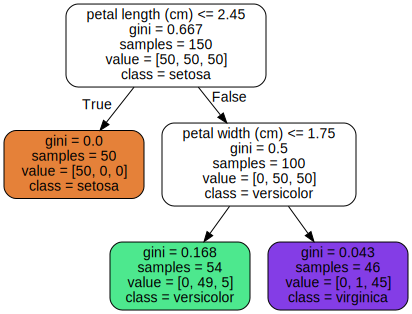

In [16]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

In [17]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [18]:
tree_clf.predict([[5, 1.5]])

array([1])

## Regression

In [19]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [22]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

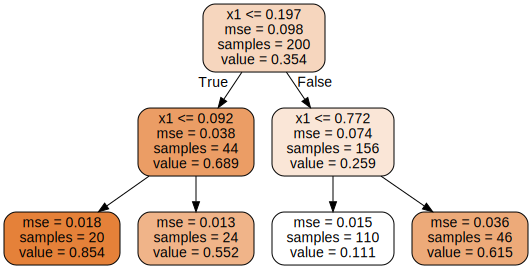

In [23]:
export_graphviz(
        tree_reg,
        out_file=os.path.join(IMAGES_PATH, "square_tree.dot"),
        feature_names=['x1'],
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "square_tree.dot"))

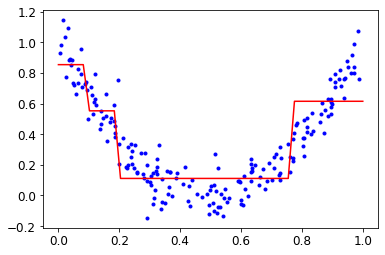

In [26]:
X_new = np.linspace(0.0, 1.0).reshape(-1, 1)

y_pred = tree_reg.predict(X_new)

plt.plot(X, y, 'b.')
plt.plot(X_new, y_pred, 'r-')

## Questions

## 1
Zakładając zrównoważenie węzłów około log2(|X|)

## 2
Nie zawsze, choć przeważnie tak jest.

### 3
Jeżeli model ulega przetrenowaniu (obarczony jest zbyt dużą wariancją) warto jest zmniejszyć wartość parametru max_depth, ponieważ wtedy drzewo będzie niższe i co za tym idzie mniej dopasowane do danych.

### 4
W przypadku drzew decyzyjnych nie trzeba skalować danych

### 5
10 ** 6 ~ 1h 
10 ** 7 ~ ??

Złożoność trenowania drzewa decyzyjnego:
O(n * m * log_2(m)), gdzie:
n - liczba cech
m - liczba próbek

Zatem czas potrzebny na wytrenowanie drzewa:
m = 10 ** 6
1h * (n * 10m * log_2(10m)) / (n * m * log_2(m)) = 
10 * 7 / 6 * 1h ~ 11.7h

### 6
presort=True należy używać jedynie do małych zbiorów (kilka tysięcy) inaczej taka opcja wydłuża trening.

### 7
Dane sierpowate

In [3]:
from sklearn.datasets import make_moons
import numpy as np
np.random.seed(42)

X, y = make_moons(n_samples=10_000, noise=0.4)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
print(len(X_train))
print(len(X_test))

7500
2500


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'max_leaf_nodes': [10, 20, 30, 50, 100],
    }
]

tree_clf = DecisionTreeClassifier()
cv_search = GridSearchCV(tree_clf, param_grid, cv=5,
                        n_jobs=-1, verbose=2)
cv_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.7s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'max_leaf_nodes': [10, 20, 30, 50, 100]}], verbose=2)

In [8]:
print(cv_search.best_score_)
print(cv_search.best_params_)

0.8604
{'max_leaf_nodes': 30}


In [17]:
param_grid = [
    {
        'max_leaf_nodes': [i for i in range(20, 40)],
        'max_depth':  [i for i in range(10)]
    }
]

tree_clf = DecisionTreeClassifier()
cv_search = GridSearchCV(tree_clf, param_grid, cv=5,
                        n_jobs=-1, verbose=2)
cv_search.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.1s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'max_leaf_nodes': [20, 21, 22, 23, 24, 25, 26, 27, 28,
                                             29, 30, 31, 32, 33, 34, 35, 36, 37,
                                             38, 39]}],
             verbose=2)

In [18]:
print(cv_search.best_score_)
print(cv_search.best_params_)

0.8612
{'max_depth': 8, 'max_leaf_nodes': 28}


In [19]:
best_clf = DecisionTreeClassifier(max_leaf_nodes=28, max_depth=8)
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=28)

In [20]:
from sklearn.metrics import accuracy_score

y_pred = best_clf.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
print(acc_test)

0.8604


### 8

In [22]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=1000, test_size=None)

forrest = []
for train_idx, test_idx in rs.split(X_train):
    tree_clf = DecisionTreeClassifier()
    tree_clf.fit(X_train[train_idx], y_train[train_idx])
    forrest.append(tree_clf)

In [24]:
mean_acc = 0
for tree in forrest:
    y_pred = tree.predict(X_test)
    tree_acc = accuracy_score(y_test, y_pred)
    mean_acc += tree_acc
    
mean_acc /= len(forrest)
mean_acc

0.8004880000000008

In [34]:
from tqdm import tqdm
predictions = []
for xt in tqdm(X_test):
    forrest_pred = []
    for tree in forrest:
        forrest_pred.append(tree.predict([xt]))
    res = mode(np.vstack(forrest_pred).flatten())
    ans = res.mode[0]
    predictions.append(ans)

100%|██████████| 2500/2500 [02:48<00:00, 14.86it/s]


In [35]:
accuracy_score(y_test, predictions)

0.8168

In [45]:
# time to improve
fr_pred = []
for tree in forrest:
    tree_pred = tree.predict(X_test)
    fr_pred.append(tree_pred)
res = np.vstack(fr_pred)
y_pred = mode(res, axis=0).mode.flatten()
len(y_pred)

2500

In [46]:
accuracy_score(y_test, y_pred)

0.8168